##**Problem Statement**
 
* The executives at the company think  that there has been a decline in new monthly subscribers compared to the past year due to current webpage not being designed well enough to keep customers engaged long enough to make a decision to subscribe.

* Hence, a new landing page has been created by the design team.

* 100 users were randomly selected and were equally into two groups. 


1.   Control group- The existing landing page was served to this group
2.   Treatment group - the new landing page was presented to this group.

##**Objectives**


*  Explore the data and perform a statistical analysis (at a significance level of 5%). 

* Analyze the  effectiveness of the new landing page in gathering new subscribers by answering the following questions 


1.   Do the users spend more time on the new landing page than on the existing landing page?
2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?
 





In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import scipy.stats as stats 

##**Data Dictionary**


1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = "/content/drive/MyDrive/abtest.csv" 
df = pd.read_csv(df)


In [ ]:
df.shape

(100, 6)



*  The data set consists of 100 rows and 6 columns. 



In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB




*   There are 4 object type colums and two numerical types.



In [ ]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64



*   There are no missing values in the data.



In [ ]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000





*   User Id is catagorical value so we will ignore the values above.
*   The maximum amount of time spent on the page was 10.7 minutes while thw minimum was 0.19 minutes.
* The average amount of time spent on the page was 5.37 minutes.





##**Univariate Analysis**


###A. Group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

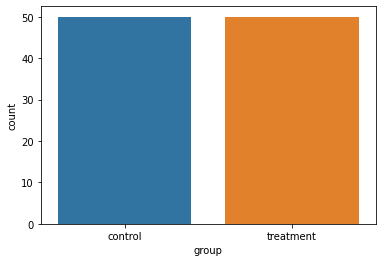

In [ ]:
sns.countplot(data=df,x='group')
plt.show()



*   There are two types of group in this study: Contol and treatment
*   As stated earlier, the conrol groups are presented with the existing landing page while the treatment group was served with the newly designed page.



###B. Landing Page

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

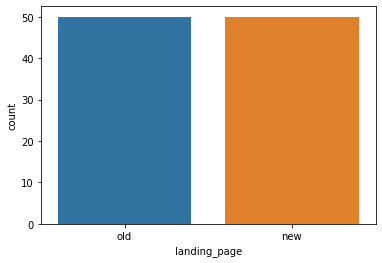

In [ ]:
sns.countplot(data=df,x='landing_page')
plt.show()



*   There are two types of landing pages: old and new.
*   Both the old and new page have 50 assigned users each.



###C. Time spent on the page

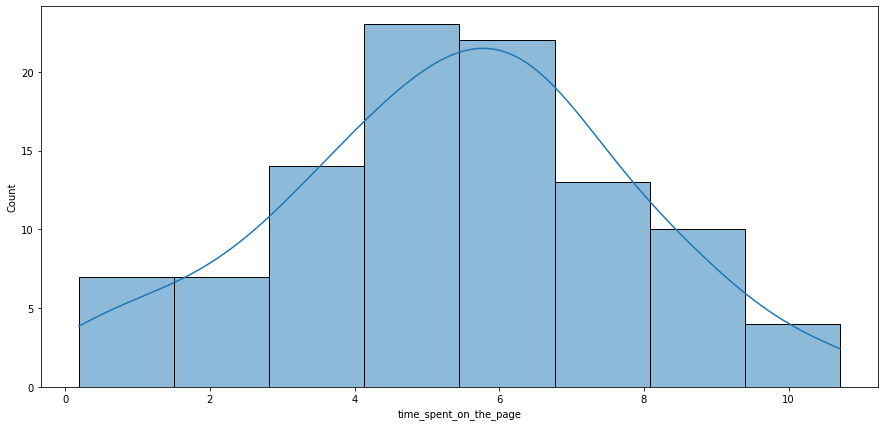

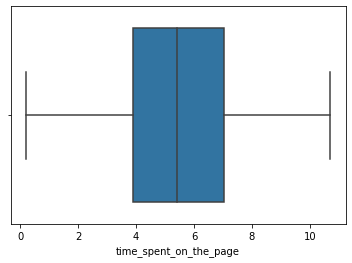

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df,x='time_spent_on_the_page',kde=True);
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()



*   The amount of time spent on the page is between 0.19 to 10.7 minutes. 
* The average amount of time spent on the page was 5.37 minutes.




###D. Converted

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

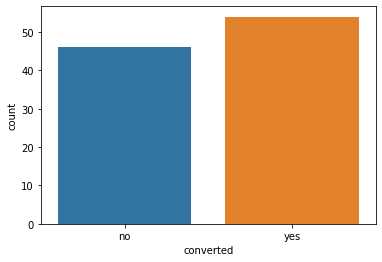

In [ ]:
sns.countplot(data=df,x='converted')
plt.show()



*   Out the randomly selected 100 users, 54 user subscribed to the page while the remaining 46 user did not.



###E. Language preferred

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

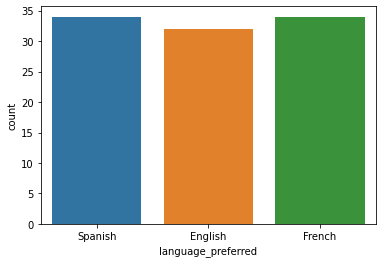

In [ ]:
sns.countplot(data=df,x='language_preferred')
plt.show()



*   From the above plot we can observe that both Spanish and French languages were preferred by 34 users each while 32 users prefer to read in English.



##Bivariate Analysis

###A. Landing page vs time spent on the page.

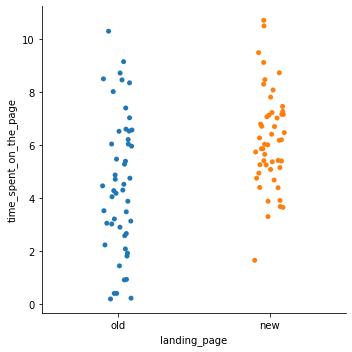

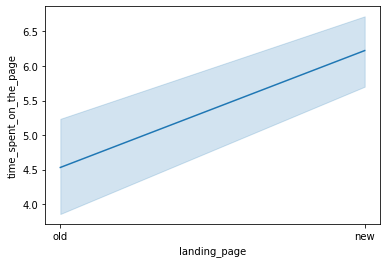

In [ ]:
sns.catplot(data=df, x='landing_page', y='time_spent_on_the_page');
plt.show()
sns.lineplot(data = df , x = 'landing_page' , y = 'time_spent_on_the_page');
plt.show()



* The group that were shown the newly designed page or also know as the treatment group spent more time on the page compaired to the contol group.



###B. Time spent on the page vs language preferred.

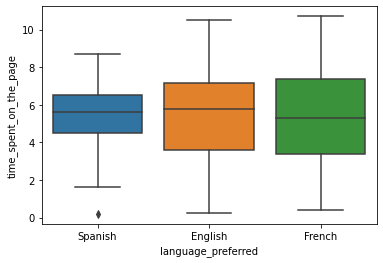

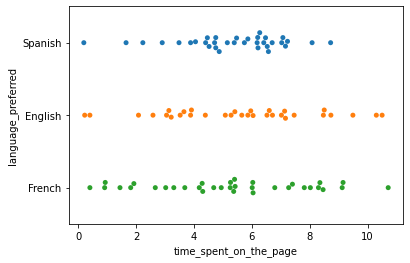

In [ ]:
plt.figure() 
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.show()
sns.swarmplot(data=df,x="time_spent_on_the_page", y="language_preferred");
plt.show()



*   From this plot we can that Frech and English speakers spent more time on the page compaired to the Spanish speakers. 



###C. Landing page vs language preferred.

In [ ]:
df.groupby(['landing_page','language_preferred']).count()

user_id  group  time_spent_on_the_page  \
landing_page language_preferred                                           
new          English                  16     16                      16   
             French                   17     17                      17   
             Spanish                  17     17                      17   
old          English                  16     16                      16   
             French                   17     17                      17   
             Spanish                  17     17                      17   

                                 converted  
landing_page language_preferred             
new          English                    16  
             French                     17  
             Spanish                    17  
old          English                    16  
             French                     17  
             Spanish                    17

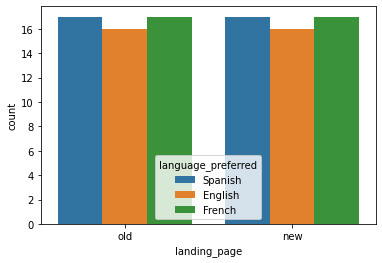

In [ ]:
plt.figure() 
sns.countplot(data=df, x='landing_page',hue='language_preferred')
plt.show()          



*   It seems like the old and the new page have the same amount of user per language preferred.



###D. Language preferred vs Convertion.

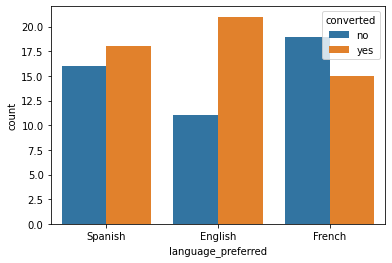

In [ ]:
plt.figure() 
sns.countplot(data=df, x='language_preferred',hue='converted')
plt.show()



*   More Spanish and English language user were converted to subsciber compaired to French users.




###E. Convertion vs landing page

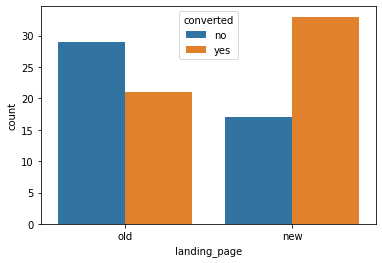

In [ ]:
plt.figure() 
sns.countplot(data=df, x='landing_page',hue='converted')
plt.show()



*   As seen on this plot, users are not subscribing to the old page compared to the new page.
*   55 users subscribed while the remaining 45 did not.



###F. Convertion vs time spent on the page.

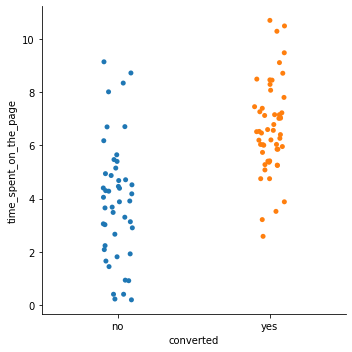

In [ ]:
sns.catplot(data=df, x='converted', y='time_spent_on_the_page');
plt.show()


* Users who spent more amout of time on the landing page tend to be a subscriber compared to those who spent less. 




###1. Do the users spend more time on the new landing page than the existing landing page?

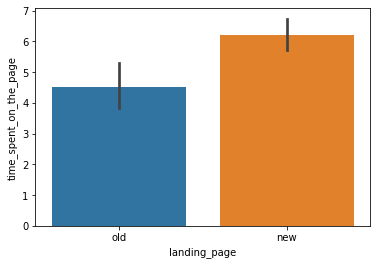

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=df, x='landing_page', y= "time_spent_on_the_page");



*   As seen above on the plot, more users spend a greater amount time on the new landing page compared to the old.



####The null and alternate hypotheses.

*   Ho: The users spend equal avarage amount of time on the new and existing page.

$H_0:\mu_1=\mu_2$

* Ha: The users spent greater average amount of time on the new page than the exisiting page.

$H_a:\mu_1>\mu_2$



###The appropriate test selected 


*   Two sample independet t-test.


> Reasons:
 

1.   There are two independent sample means
2. Random sampling from the population 
3. Unequal population standard deviations
4. Continuous data   

#### Level of siginificance


*   5%



#### Data collection and statistic calculation

In [ ]:
new_page = df[df["landing_page"] == "new"]["time_spent_on_the_page"]
old_page = df[df["landing_page"] == "old"]["time_spent_on_the_page"]

In [ ]:
print("The New landing page mean is:", str (new_page.mean()))
print("The New landing page standard deviation is:", round(new_page.std(), 2))
print("The Old landing page mean is:", str (old_page.mean()))
print("The Old landing page standard deviation is:", round(old_page.std(), 2))

The New landing page mean is: 6.2232
The New landing page standard deviation is: 1.82
The Old landing page mean is: 4.532400000000001
The Old landing page standard deviation is: 2.58


####p-Value calculation

In [ ]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(new_page,old_page.dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


####p-Value vs alpha

In [ ]:
print("Since the p-Value is less than the level of significance, we reject the null hypothesis.")

Since the p-Value is less than the level of significance, we reject the null hypothesis.


####insight

Since the p-Value is < 0.05, we can reject the null hypothesis. Therefore, we have enough statistical evidence that shows the time spent by users on the new landing page is grater than on the existing landing page.

###2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

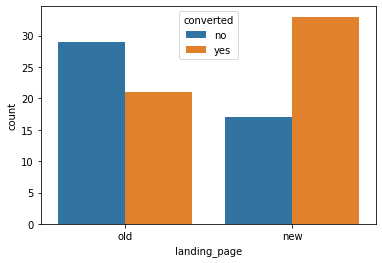

In [12]:
plt.figure() 
sns.countplot(data=df, x='landing_page',hue='converted')
plt.show()



*   From the above plot it seems like alot more users converted to subscriber on the new page.



####The null and alternate hypotheses.

*   Ho: The conversion rate for the new page is equal to the old page. 

>$H_0:p_1 =p_2$

* Ha: The conversion rate for the new page is greater than the old page.

>$H_a:p_1 \neq p_2$

###The appropriate test selected 


*   Two proportions z-test.


> Reasons:
 

1. We are testing for equality of two population proportions.   
2. There are two independent populations.
3. Random sampling from the population 
  

#### Level of siginificance


*   5% (0.05)


#### Data collection and statistic calculation

In [ ]:
new_converted = df[df["group"] == "treatment"]["converted"].value_counts()["yes"]
old_converted = df[df["group"] == "control"]["converted"].value_counts()["yes"]
print(new_converted)
print(old_converted)

33
21




*   33 users covterted after the new landing page was presented to them while only 21 users subscibed to the exisiting  page.



In [ ]:
total_control = df.landing_page.value_counts()["old"]
total_treatment = df.landing_page.value_counts()["new"]
print(total_control)
print(total_treatment)

50
50


####p-Value calculation

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

converted_count = np.array([33, 21])
groups = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, groups, alternative =
'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


####p-Value vs alpha



*   The p-Value is 0.008 which is smaller than the siginificance (0.05).




###Insight

*   Since the p-Value is smaller, we can reject the null hypothesis. 
* we have enough statistical evidence to say that the convertion rate of the new landing page is greater than the old page.
* This simply means more users were subscribing to the new landing page compared to the old.



###3. Is the conversion and preferred language are independent or related?

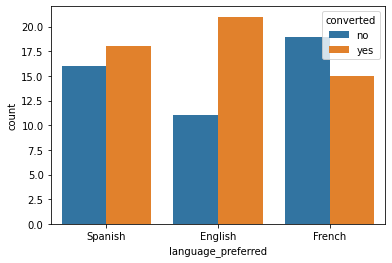

In [13]:
plt.figure() 
sns.countplot(data=df, x='language_preferred',hue='converted')
plt.show()

In [ ]:
language_convertion= pd.crosstab(index=df["language_preferred"], columns=df["converted"])
language_convertion

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


####The null and alternate hypotheses.

*   Ho: Conversion and preferred language are independent of eachother. 
* Ha: Conversion and preferred language are related(not independent).

###The appropriate test selected 


*   Chi-Square Test for Independence.


> Reasons:
 

1. catagorical varaiables   
2. Random sampling from the population 

####Let's find the p-value

In [ ]:
from scipy.stats import chi2_contingency
chi, p_value, dof, expected = chi2_contingency(language_convertion)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


####p-Value vs alpha


*   The p-Value is greater than the significance level (0.05).



###Insight

*   Since the p-Value is greater the significance level, we fail to reject the null hypothesis. 
* we have enough statistical evidence to say that the convertion is independent of language preferred.

###4. Is the time spent on the new page same for the different language users?

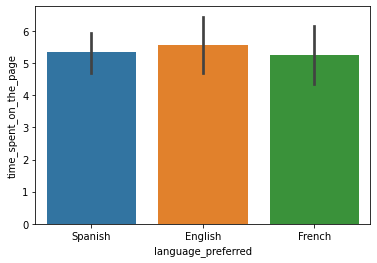

In [14]:

plt.figure() 
sns.barplot(data=df, x='language_preferred',y='time_spent_on_the_page')
plt.show()

In [ ]:
new_landingpage = df[(df['landing_page']=="new")]
print(new_landingpage.groupby("language_preferred")["time_spent_on_the_page"].mean())
print("-"*50)
print(new_landingpage.groupby("language_preferred")["time_spent_on_the_page"].std())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64
--------------------------------------------------
language_preferred
English    1.984150
French     1.933394
Spanish    1.525656
Name: time_spent_on_the_page, dtype: float64




*   The mean and the standard deviation of the languages is displayed above.



### The null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the mean amount of time spent on the new landing page by each of the three languages calculated above.

The null hypothesis - The mean amount of time spent on the new landing page by the three languages is equal.

>$H_0: \mu_1 = \mu_2 = \mu_3$

The alternative hypothesis

>$H_a: $ At least one mean different from the rest.


###The appropriate test selected 


*   One-way ANOVA.


> The normality and equality of variance assumptions need to be checked using Shapiro-Wilk’s test and Levene test repecively.
#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the landing page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the landing page does not follow a normal distribution

In [ ]:
from scipy import stats
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742




*   Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s test

Null hypothesis

>$H_0$: All the population variances are equal

Alternative hypothesis

>$H_a$: At least one variance is different from the rest



In [ ]:
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['language_preferred']=="English"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="French"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="Spanish"])
print('The p-value is', p_value)

The p-value is 0.06515086840327314




*   Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.



###p-Value Calulation:

In [ ]:
from scipy.stats import f_oneway
test_stat, p_value = stats.f_oneway(new_landingpage.loc[new_landingpage['language_preferred'] == 'English',
'time_spent_on_the_page'], new_landingpage.loc[new_landingpage['language_preferred'] == 'French','time_spent_on_the_page'], new_landingpage.loc[new_landingpage['language_preferred'] == 'Spanish',
'time_spent_on_the_page'])
print('The p-value is ', p_value)

The p-value is  0.43204138694325955




####p-Value vs alpha


*   The p-Value is greater than the significance level (0.05).





###Insight

*   Since the p-Value is greater the significance level, we fail to reject the null hypothesis. 
* we have enough statistical evidence to say that the mean amount of time
spent on the new page is equal for the three different languages users.



###Conclusion


*   Out the selected 100 users, 54 user subscribed to the page while the remaining 46 user did not.
* The treatment group spent more time on the page compaired to the contol group.
* More users were subscribing to the new landing page compared to the old.
* More Spanish and English language user were converted to subsciber compaired to French users.
* Users who spend more amout of time on the landing page tend to be a subscriber compared to those who spend less.

###Recommendations 
* It is statistically proven that the new landing page is much more effective at gaining subscribers than the existing page.
* The new landing page should replace the old so the page can attaract more users. 

